## Colon Cancer Survival Analysis

In [28]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data set

In [29]:
# importing the stats library
import pyreadstat
# loadoing the dataset
colcan_data, meta = pyreadstat.read_sav("COLON.SAV")

In [30]:
colcan_data.head()

,AGE,SEX,CHANCE,PATTERN,BLDLOSS,STOMACHE,WGHTLOSS,ILEUS,STATUS,STAGE,LOC,SURV,OPYEAR,AGEGR
0,74.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,9.191,72.0,3.0
1,63.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0,0.419,62.0,2.0
2,80.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,3.0,3.058,63.0,3.0
3,76.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,1.927,63.0,3.0
4,25.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,4.0,0.931,66.0,1.0


In [31]:
colcan_data.tail()

,AGE,SEX,CHANCE,PATTERN,BLDLOSS,STOMACHE,WGHTLOSS,ILEUS,STATUS,STAGE,LOC,SURV,OPYEAR,AGEGR
561,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,17.043,58.0,2.0
562,61.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,2.0,0.660,58.0,2.0
563,68.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,1.561,58.0,2.0
564,70.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,12.986,58.0,2.0
565,62.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,6.535,58.0,2.0


Checking the variables in the data set.

In [32]:
#checking the variables in the dataset in list format
colcan_data.columns.tolist()

['AGE',
 'SEX',
 'CHANCE',
 'PATTERN',
 'BLDLOSS',
 'STOMACHE',
 'WGHTLOSS',
 'ILEUS',
 'STATUS',
 'STAGE',
 'LOC',
 'SURV',
 'OPYEAR',
 'AGEGR']

Checkinh the datatypes

In [33]:
# checking the datatypes
colcan_data.dtypes

AGE         float64
SEX         float64
CHANCE      float64
PATTERN     float64
BLDLOSS     float64
STOMACHE    float64
WGHTLOSS    float64
ILEUS       float64
STATUS      float64
STAGE       float64
LOC         float64
SURV        float64
OPYEAR      float64
AGEGR       float64
dtype: object

Checking for missing values

In [34]:
# checking for missing values
colcan_data.isnull().sum()

AGE         0
SEX         0
CHANCE      0
PATTERN     0
BLDLOSS     0
STOMACHE    0
WGHTLOSS    0
ILEUS       0
STATUS      0
STAGE       0
LOC         0
SURV        0
OPYEAR      0
AGEGR       0
dtype: int64

Changing data types 

In [35]:
# converting categorical variables to category type
cateorical_vars = ["SEX","CHANCE", "PATTERN","BLDLOSS","STOMACHE","WGHTLOSS","ILEUS","STATUS","STAGE","LOC"]

colcan_data[cateorical_vars]= colcan_data[cateorical_vars].astype("category")

# converting float variables to int type
for col in cateorical_vars:
    colcan_data[col] =colcan_data[col].astype("int").astype("category")

# confirming the changes
colcan_data.dtypes

AGE          float64
SEX         category
CHANCE      category
PATTERN     category
BLDLOSS     category
STOMACHE    category
WGHTLOSS    category
ILEUS       category
STATUS      category
STAGE       category
LOC         category
SURV         float64
OPYEAR       float64
AGEGR        float64
dtype: object

Checking the summary statistic for the dataset

In [36]:
# checking summary statistics
colcan_data.describe(include="all")

,AGE,SEX,CHANCE,PATTERN,BLDLOSS,STOMACHE,WGHTLOSS,ILEUS,STATUS,STAGE,LOC,SURV,OPYEAR,AGEGR
count,566.000000,566.0,566.0,566.0,566.0,566.0,566.0,566.0,566.0,566.0,566.0,566.000000,566.000000,566.000000
unique,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,NaN,NaN,NaN
top,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN
freq,NaN,287.0,520.0,319.0,303.0,327.0,388.0,515.0,408.0,211.0,244.0,NaN,NaN,NaN
mean,65.780919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.770231,68.671378,2.095406
std,11.707258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.818686,6.109745,0.799168
min,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003000,58.000000,1.000000
25%,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.734500,63.000000,1.000000
50%,67.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.107000,69.000000,2.000000
75%,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.754750,74.000000,3.000000


In [37]:
# checking the summary statistics for the numeric variables
colcan_data.describe()

,AGE,SURV,OPYEAR,AGEGR
count,566.000000,566.000000,566.000000,566.000000
mean,65.780919,4.770231,68.671378,2.095406
std,11.707258,4.818686,6.109745,0.799168
min,20.000000,0.003000,58.000000,1.000000
25%,60.000000,0.734500,63.000000,1.000000
50%,67.000000,3.107000,69.000000,2.000000
75%,74.000000,7.754750,74.000000,3.000000
max,93.000000,22.494000,78.000000,3.000000


Value count for categorical variables

In [38]:
#  checking value counts for categorical variables
print("\n categorical variable distribution")
for col in cateorical_vars:
    print(f"\n{col}: \n {colcan_data[col].value_counts()}")


 categorical variable distribution

SEX: 
 SEX
0    287
1    279
Name: count, dtype: int64

CHANCE: 
 CHANCE
0    520
1     46
Name: count, dtype: int64

PATTERN: 
 PATTERN
1    319
0    247
Name: count, dtype: int64

BLDLOSS: 
 BLDLOSS
0    303
1    263
Name: count, dtype: int64

STOMACHE: 
 STOMACHE
0    327
1    239
Name: count, dtype: int64

WGHTLOSS: 
 WGHTLOSS
0    388
1    178
Name: count, dtype: int64

ILEUS: 
 ILEUS
0    515
1     51
Name: count, dtype: int64

STATUS: 
 STATUS
1    408
0    158
Name: count, dtype: int64

STAGE: 
 STAGE
2    211
1    135
4    131
3     89
Name: count, dtype: int64

LOC: 
 LOC
3    244
4    138
1    135
2     49
Name: count, dtype: int64


Relabeling the categories

In [39]:
# relabeling the categories
colcan_data["SEX"]= colcan_data["SEX"].cat.rename_categories({ 0: "Male", 1: "Female"})
colcan_data["CHANCE"]= colcan_data["CHANCE"].cat.rename_categories({ 0: "No", 1: "Yes"})
colcan_data["STATUS"]= colcan_data["STATUS"].cat.rename_categories({ 0: "Censored", 1: "Dead"})
colcan_data["STAGE"]= colcan_data["STAGE"].cat.rename_categories({1: "A", 2: "B", 3: "C", 4: "D"})
colcan_data["LOC"]= colcan_data["LOC"].cat.rename_categories({1: "Coecum", 2: "Colon transcendent", 3: "colon descendent",4:"Rectum"})

Checking for changes

In [40]:
#  checking value counts for categorical variables
print("\n categorical variable distribution")
for col in cateorical_vars:
    print(f"\n{col}: \n {colcan_data[col].value_counts()}")


 categorical variable distribution

SEX: 
 SEX
Male      287
Female    279
Name: count, dtype: int64

CHANCE: 
 CHANCE
No     520
Yes     46
Name: count, dtype: int64

PATTERN: 
 PATTERN
1    319
0    247
Name: count, dtype: int64

BLDLOSS: 
 BLDLOSS
0    303
1    263
Name: count, dtype: int64

STOMACHE: 
 STOMACHE
0    327
1    239
Name: count, dtype: int64

WGHTLOSS: 
 WGHTLOSS
0    388
1    178
Name: count, dtype: int64

ILEUS: 
 ILEUS
0    515
1     51
Name: count, dtype: int64

STATUS: 
 STATUS
Dead        408
Censored    158
Name: count, dtype: int64

STAGE: 
 STAGE
B    211
A    135
D    131
C     89
Name: count, dtype: int64

LOC: 
 LOC
colon descendent      244
Rectum                138
Coecum                135
Colon transcendent     49
Name: count, dtype: int64


Visualization for common variables

In [41]:
# Setting style for better visuals
sns.set(style="whitegrid")

plotting histogram for Age & Survival

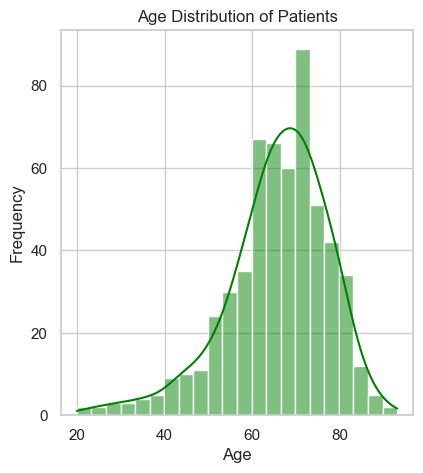

In [42]:
# plotting histogram for Age & Survival
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.histplot(colcan_data["AGE"], kde=True, color="green")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

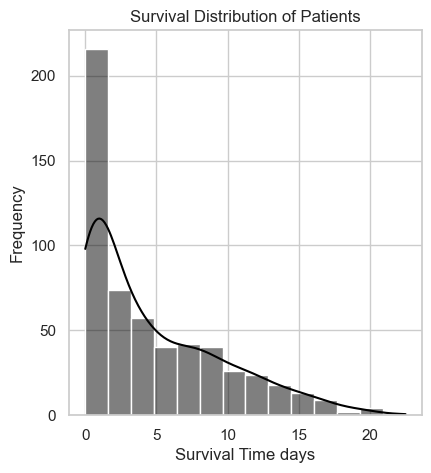

In [43]:
# plotting histogram for Survival
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.histplot(colcan_data["SURV"], kde=True, color="black")
plt.title("Survival Distribution of Patients")
plt.xlabel("Survival Time days")
plt.ylabel("Frequency")
plt.show()

Bar plot

C:\Users\PETER VITALIS\AppData\Local\Temp\ipykernel_4008\3638881435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=colcan_data, x="SEX", palette="Set2")


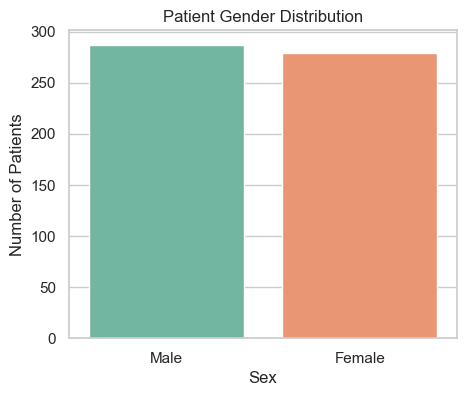

In [44]:
plt.figure(figsize=(5, 4))
sns.countplot(data=colcan_data, x="SEX", palette="Set2")
plt.title("Patient Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Number of Patients")
plt.show()


C:\Users\PETER VITALIS\AppData\Local\Temp\ipykernel_4008\2417181710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=colcan_data, x="STAGE", palette="pastel")


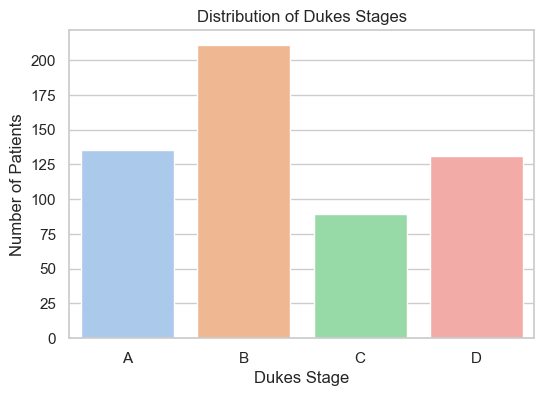

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(data=colcan_data, x="STAGE", palette="pastel")
plt.title("Distribution of Dukes Stages")
plt.xlabel("Dukes Stage")
plt.ylabel("Number of Patients")
plt.show()


C:\Users\PETER VITALIS\AppData\Local\Temp\ipykernel_4008\1478757694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=colcan_data, x="LOC", palette="muted")


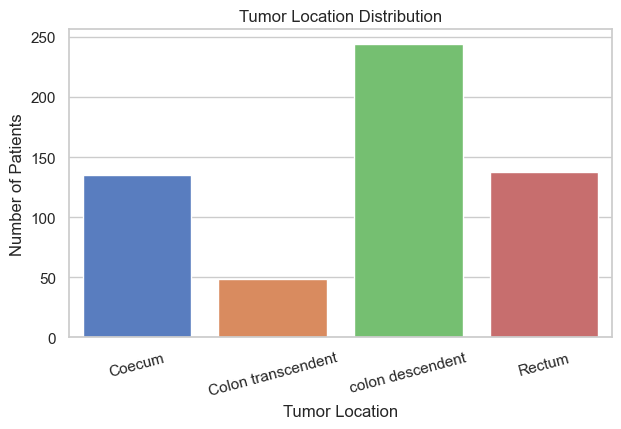

In [46]:
plt.figure(figsize=(7, 4))
sns.countplot(data=colcan_data, x="LOC", palette="muted")
plt.title("Tumor Location Distribution")
plt.xlabel("Tumor Location")
plt.ylabel("Number of Patients")
plt.xticks(rotation=15)  # Adjust if long labels
plt.show()


### Survival Analysis

##### Kaplan-Meier Survival Curve

In [47]:
# importing lifelines model for survival analysis -Kaplan-Meier estimator
from lifelines import KaplanMeierFitter

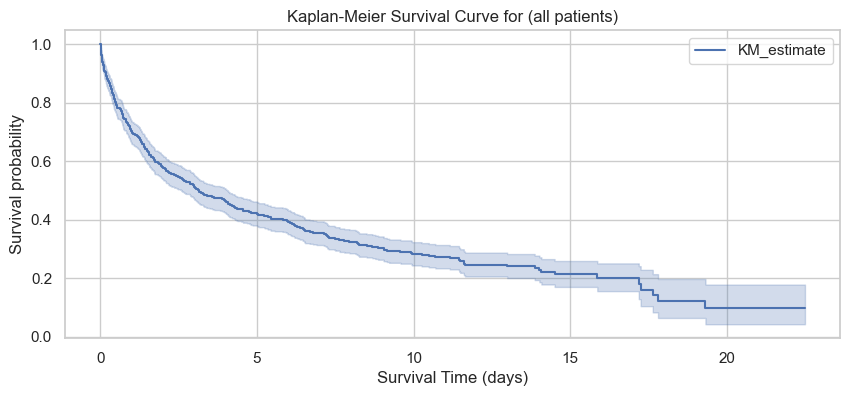

In [49]:
# initializing the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

#Definiing the event and duratuon
T = colcan_data["SURV"]  # this will be our duration variable
E = colcan_data["STATUS"].cat.codes  # this will be our event variable (0 for censored, 1 for event occurred)

# Fitting the model
kmf.fit(T, event_observed= E)

# Plotting the Kaplan-Meier survival curve
plt.figure(figsize=(10,4))
kmf.plot(ci_show=True)
plt.title("Kaplan-Meier Survival Curve for (all patients)")
plt.xlabel("Survival Time (days)")
plt.ylabel("Survival probability")
plt.grid(True)
plt.show()
